# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time 
import urllib
from scipy.stats import linregress
import scipy.stats as st


from api_keys import api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of lat and long
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [59]:
# set up lists to hold reponse info
lat_lngs = []
cities = []


#create a set of random lat and long combos 
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1400)
lat_lngs = zip(lats,lngs)


# Loop through the list of cities and perform a request for data on each
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities: 
        cities.append(city)
        
len(cities)

580

In [60]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
settings = {"units": "imperial", "appid": api_key}
url = f"{url}appid={api_key}&units={units}"

In [61]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [62]:
# Create empty lists to append the API data to 
latitude = []
longitude = []
temp_max = []
humidity = []
cloud_coverage = []
wind_speed = []
city_name = []
country = []
datetime = []

# Start counter
record_counter = 1

#Print what curretly retrieving data for 
print(f"Start Data Retrieval Process")
print(f"-------------------------------")

#Loop through list of cities and append to empty lists 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud_coverage.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        datetime.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {record_counter} | {city_record}")
        print(f"{url}&q={city}")
        
        record_counter= record_counter + 1        
        
    # Pass if city not found
    except:
        print("City not found")
    continue

Start Data Retrieval Process
-------------------------------
Processing Record 1 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=castro
City not found
Processing Record 2 | Cidreira
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=cidreira
Processing Record 3 | Chu
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=shu
Processing Record 4 | Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=rikitea
Processing Record 5 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=bandarbeyla
City not found
Processing Record 6 | Chapais
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=chapais
Processing Record 7 | Idah
http://api.openweathermap.org/data/2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
# create a data frame from cities, lat, and temp
city_weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": temp_max,
    "Humidity": humidity,
    "Cloud coverage": cloud_coverage,
    "Wind Speed": wind_speed,
    "City datetime": datetime
}
#create a data frame from the dictionary 
city_weather_df = pd.DataFrame(city_weather_dict)

city_weather_df.count()


City               528
Country            528
Latitude           528
Longitude          528
Max Temperature    528
Humidity           528
Cloud coverage     528
Wind Speed         528
City datetime      528
dtype: int64

In [67]:
#a pandas dataframe is created and saved to a .csv from the data retrievied from the API 

city_weather_df.to_csv('city_weather_df.csv', encoding='utf-8', index=False)
city_weather_df


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloud coverage,Wind Speed,City datetime
0,Castro,BR,-24.7911,-50.0119,59.95,98,13,3.22,1617079896
1,Cidreira,BR,-30.1811,-50.2056,64.98,77,22,12.88,1617079952
2,Chu,KZ,43.5983,73.7614,43.38,61,100,15.39,1617080146
3,Rikitea,PF,-23.1203,-134.9692,78.89,71,2,16.67,1617079881
4,Bandarbeyla,SO,9.4942,50.8122,79.77,57,99,4.14,1617080146
...,...,...,...,...,...,...,...,...,...
523,Taunggyi,MM,20.7833,97.0333,83.82,14,4,12.35,1617080246
524,Kibala,TD,9.1104,18.3463,71.60,43,0,4.97,1617079705
525,Port Hardy,CA,50.6996,-127.4199,42.80,70,75,4.61,1617079685
526,Doha,QA,25.2867,51.5333,73.40,46,0,16.11,1617080246


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
humidity= city_weather_df["Humidity"].max()
humidity

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

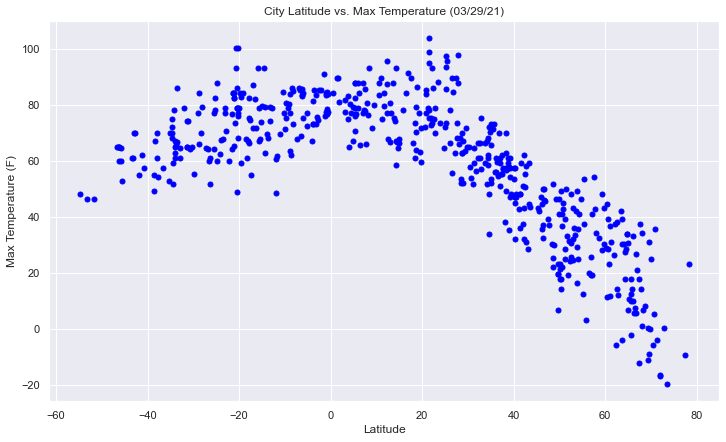

In [109]:
city_weather_df.plot.scatter(x="Latitude", y= "Max Temperature",s=25, color = "blue", figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (03/29/21)')
plt.savefig("../WeatherPy/Images/Latitude_Temperature.png")

## Latitude vs. Humidity Plot

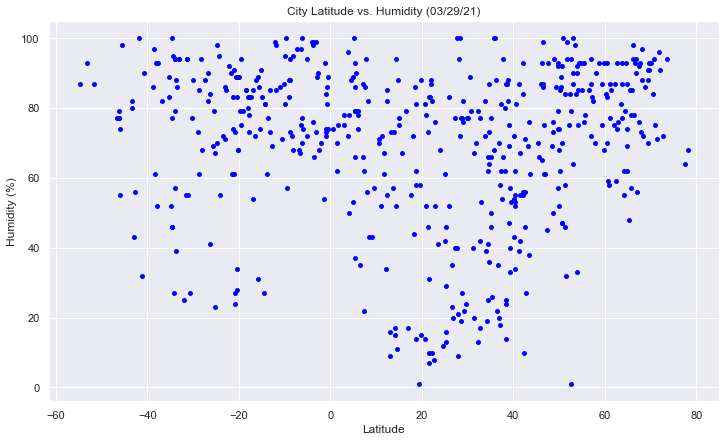

In [108]:
city_weather_df.plot.scatter(x="Latitude", y= "Humidity",s=15, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (03/29/21)')
plt.savefig("../WeatherPy/Images/Latitude_Humidity.png")


## Latitude vs. Cloudiness Plot

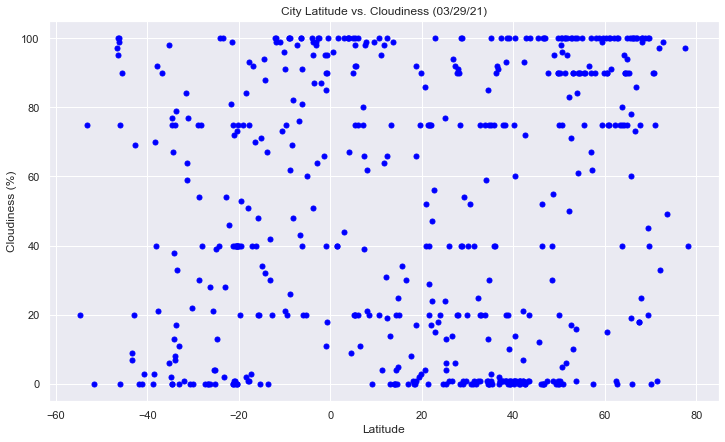

In [107]:
city_weather_df.plot.scatter(x="Latitude", y= "Cloud coverage",s=25, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03/29/21)')
plt.savefig("../WeatherPy/Images/Latitude_Cloudiness.png");

## Latitude vs. Wind Speed Plot

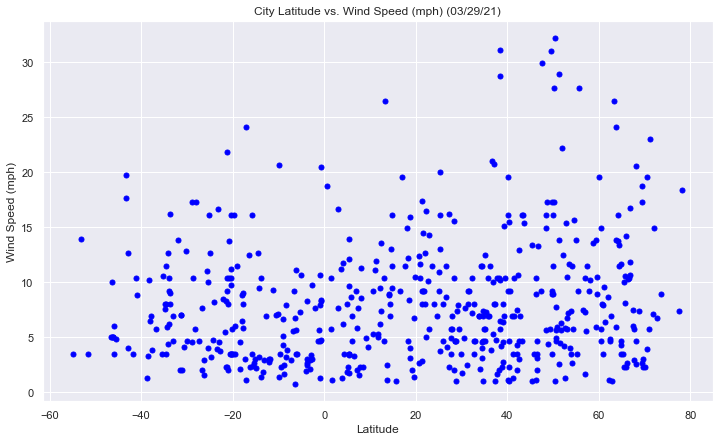

In [110]:
city_weather_df.plot.scatter(x="Latitude", y= "Wind Speed", marker = 'o',s=25, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) (03/29/21)')
plt.savefig("../WeatherPy/Images/Latitude_Wind Speed.png");

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression